In [1]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import umap
from sklearn.cluster import KMeans
import seaborn.objects as so
from statsmodels.stats import proportion

/Group16T/common/chenh2/miniconda3/envs/ml_env/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-11-23 10:42:37.016126: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-23 10:42:37.034599: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-23 10:42:37.075963: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-11-23 10:42:37.075981: E external/local_xla/xla/stream_executor/c

In [2]:
#all, TNKI, THM, YCTKP, TCN, HT
# load data
file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all.csv"

df = pd.read_csv(file_path)

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_65+yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
df['rate65']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_50-64yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y50_64 = temp["rate"].values
df['rate50_64']= temp["rate"]

file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
#file_path = "/Group16T/common/chenh2/NTNU_ES_data/ER_data_new/Merged_all_30-49yr.csv"
temp = pd.read_csv(file_path)
temp = temp.dropna().reset_index(drop=True)
#y30_49 = temp["rate"].values
df['rate30_49']= temp["rate"]

#df = df.iloc[:, 73:] # only use air polution data

#group = file_path.split("\\")[-1].replace(".csv", "")

# === 移除 NaN ===
df = df.dropna().reset_index(drop=True)

# === 特徵與目標 ===
drop_cols = ["day", "Count_all", "Count_cvd", "rate", "rate65",'rate50_64','rate30_49']
features = [col for col in df.columns if col not in drop_cols]
X = df[features].values
y = df["rate"].values
y65 = df["rate65"].values
y50_64 = df["rate50_64"].values
y30_49 = df["rate30_49"].values
#y = df["Count_cvd"].values

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
date = df["day"].values
year = []
month = []
for n in date:
    [temp1, temp2,temp3] = n.split('-')
    year.append(int(temp1))
    month.append(int(temp2))
#year = np.array(year)
month = np.array(month)

In [5]:
df[features] = X_scaled
df['year'] = year
df['month'] = month

/tmp/ipykernel_1496362/3097774729.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['year'] = year
/tmp/ipykernel_1496362/3097774729.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['month'] = month


In [6]:
# Define a function to map month to season
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

# Apply the function to create a new 'season' column
df['season'] = df['month'].apply(month_to_season)

/tmp/ipykernel_1496362/1648050244.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['season'] = df['month'].apply(month_to_season)


In [7]:
reducer = umap.UMAP(random_state=54)
#reducer = umap.UMAP(random_state=5)
#reducer = umap.UMAP(random_state=40)
embedding = reducer.fit_transform(X_scaled)
embedding.shape

/Group16T/common/chenh2/miniconda3/envs/ml_env/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


(8369, 2)

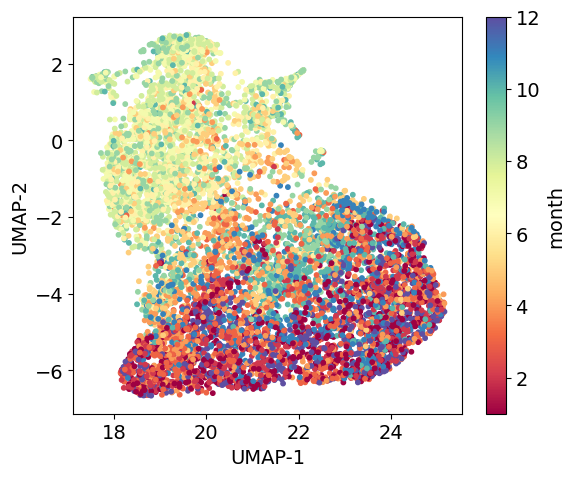

In [8]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df.month, s=10, cmap='Spectral')
cb = plt.colorbar(scat)
cb.set_label('month')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by month')
plt.tight_layout(); plt.show()

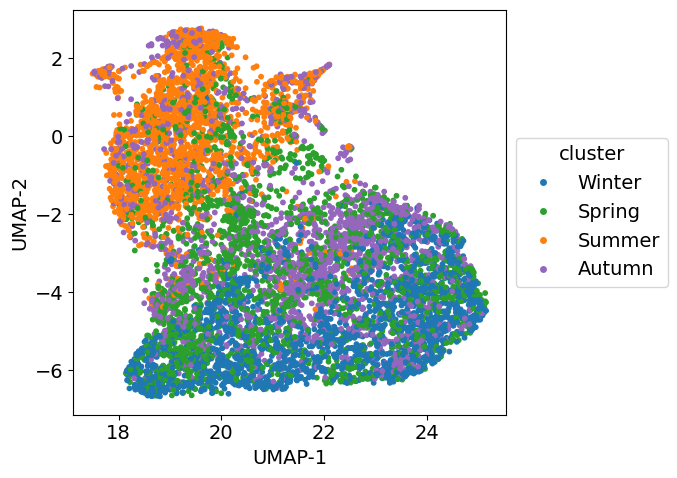

In [9]:
plt.figure(figsize=(7, 5))
plt.rcParams.update({'font.size': 14}) 

season_to_color = {'Winter':'#1f77b4','Spring':'#2ca02c','Summer':'#ff7f0e','Autumn':'#9467bd'}
colors = df['season'].map(season_to_color).to_numpy()

scat = plt.scatter(embedding[:,0], embedding[:,1], c=colors, s=10)

handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Winter', markerfacecolor='#1f77b4', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Spring', markerfacecolor='#2ca02c', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Summer', markerfacecolor='#ff7f0e', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='Autumn', markerfacecolor='#9467bd', markersize=6)
]
plt.legend(handles=handles, title='cluster',loc='center left',bbox_to_anchor=(1.0, 0.5))

plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

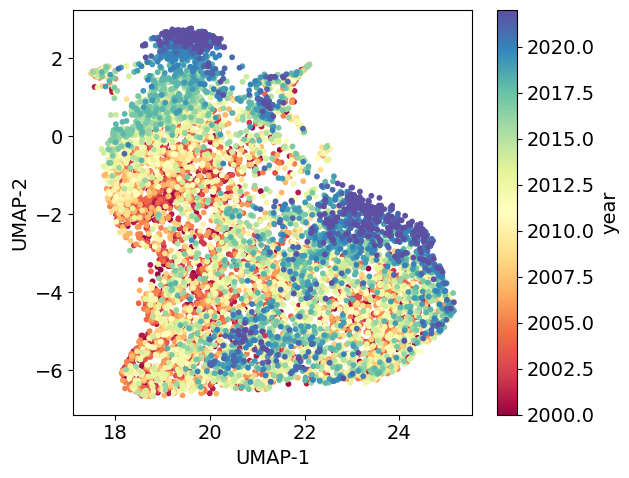

In [10]:
plt.figure(figsize=(6.5, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df.year, s=10, cmap='Spectral')
cb = plt.colorbar(scat)
cb.set_label('year')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

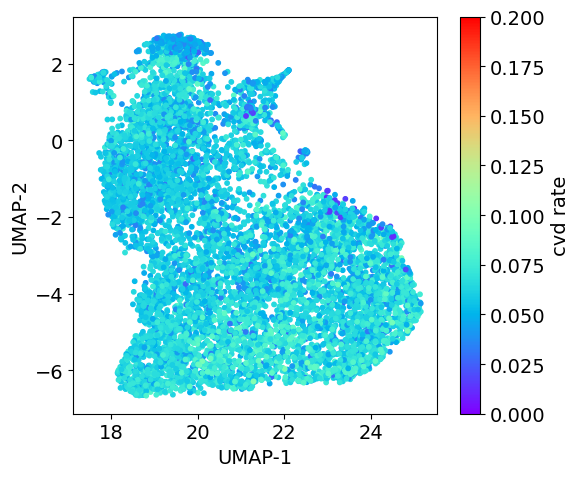

In [11]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y, s=10, cmap='rainbow',vmax=0.2,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y, s=3, cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

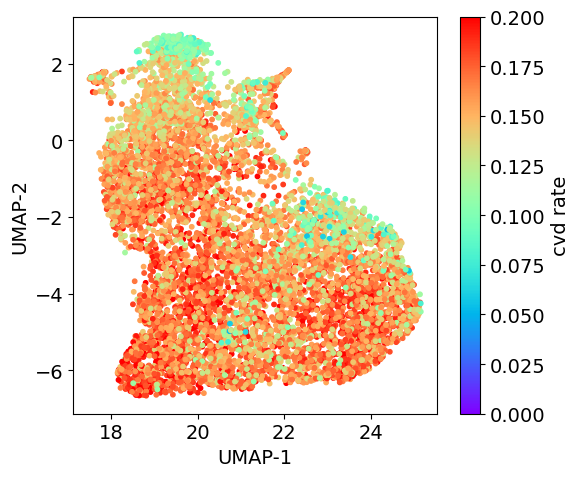

In [12]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y65, s=10, cmap='rainbow',vmax=0.20,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y65, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

In [13]:
print(np.mean(y))
print(np.mean(y65))
print(np.mean(y50_64))
print(np.mean(y30_49))

0.05990284724841087
0.1620181754845262
0.08853434505998327
0.02899876060126658


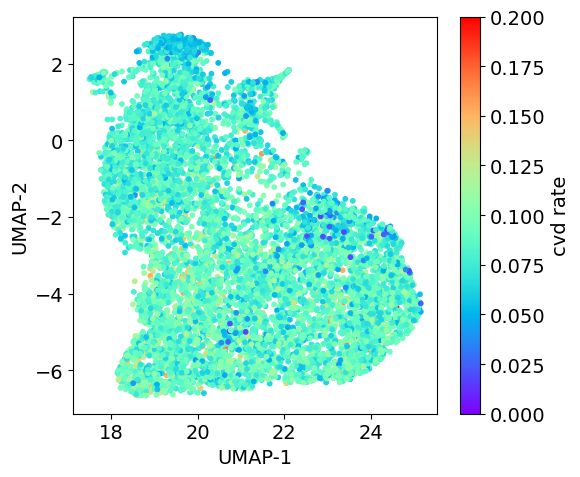

In [14]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y50_64, s=10, cmap='rainbow',vmax=0.2,vmin=0.0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y50_64, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

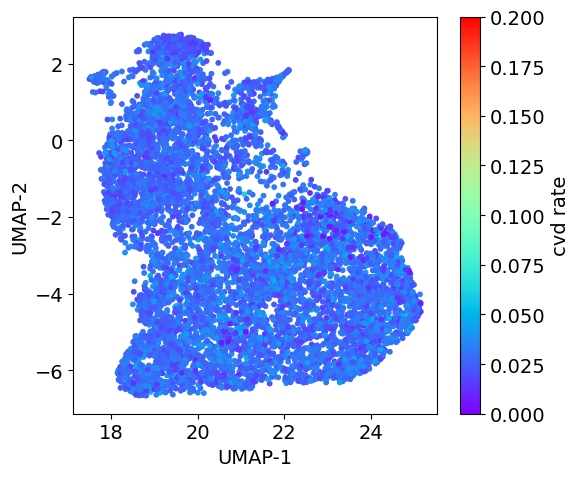

In [15]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=y30_49, s=10, cmap='rainbow',vmax=0.2,vmin=0)
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=y30_49, s=3,cmap='coolwarm')
cb = plt.colorbar(scat)
cb.set_label('cvd rate')
plt.xlabel('UMAP-1'); plt.ylabel('UMAP-2'); 
#plt.title('UMAP colored by year')
plt.tight_layout(); plt.show()

In [16]:
y_pred = KMeans(n_clusters=2,n_init=100,random_state=30).fit_predict(X_scaled)
#df['cluster']=np.char.mod('%d', y_pred)

df['cluster_raw'] = y_pred

# Determine which cluster is smaller
cluster_counts = df['cluster_raw'].value_counts().to_dict()
small_cluster = min(cluster_counts, key=cluster_counts.get)

# Remap: smaller cluster → 0, larger → 1
df['cluster'] = df['cluster_raw'].apply(lambda x: 0 if x == small_cluster else 1)

# Convert to string (e.g., 'Cluster_0' / 'Cluster_1')
df['cluster_str'] = df['cluster'].astype(str)

#status_mapping = {0: '0', 1: '1',}
#df['cluster'] = df['cluster'].map(status_mapping)

/tmp/ipykernel_1496362/457334968.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster_raw'] = y_pred
/tmp/ipykernel_1496362/457334968.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cluster'] = df['cluster_raw'].apply(lambda x: 0 if x == small_cluster else 1)
/tmp/ipykernel_1496362/457334968.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instea

In [17]:
df['cluster'].value_counts()

cluster
1    5779
0    2590
Name: count, dtype: int64

In [18]:
df['cluster_str'].value_counts()

cluster_str
1    5779
0    2590
Name: count, dtype: int64

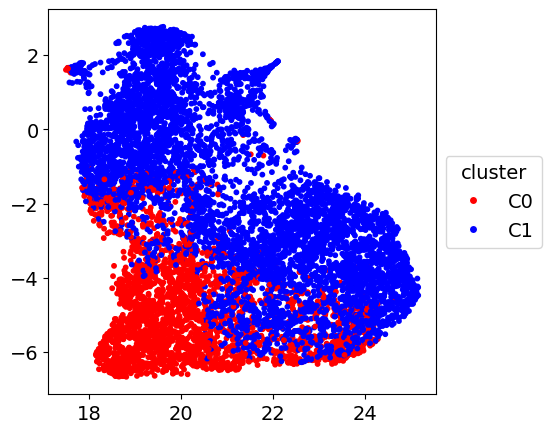

In [19]:
#colors = ['red' if label == 0 else 'blue' for label in y_pred]
plt.figure(figsize=(5, 5))
plt.rcParams.update({'font.size': 14}) 
scat = plt.scatter(embedding[:,0], embedding[:,1], c=df['cluster'], s=10, cmap='bwr_r')
#scat = plt.scatter(embedding[:,0], embedding[:,1], c=df['cluster'], s=10, cmap='bwr_r')

# Create custom legend
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='C0', markerfacecolor='red', markersize=6),
    plt.Line2D([0], [0], marker='o', color='w', label='C1', markerfacecolor='blue', markersize=6)
]
plt.legend(handles=handles, title='cluster',loc='center left',bbox_to_anchor=(1.0, 0.5))

In [20]:
target_y = y30_49
threshold = np.mean(target_y)
#using chi2 to test the proportion of high CVD (> average counts) byetween two kmeans clusters
cvd_risk = []
for n in target_y:
    if n > threshold:
        cvd_risk.append('high')
    else:
        cvd_risk.append('low')
df['cvd_risk'] = cvd_risk

/tmp/ipykernel_1496362/4109077205.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['cvd_risk'] = cvd_risk


Chi-square statistic: 17.900356237786756
p-value: 2.327775331065018e-05


/tmp/ipykernel_1496362/2461966734.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count = [a[0], a[2]]


<Figure size 600x500 with 0 Axes>

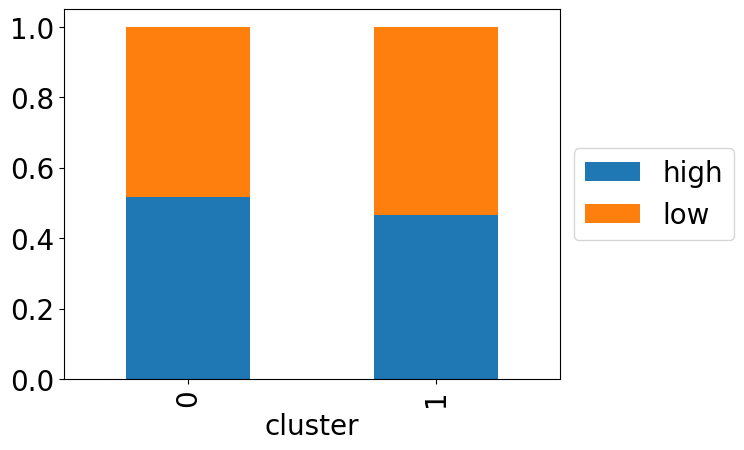

In [21]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 20}) 

#https://stackoverflow.com/questions/43074199/how-to-plot-stacked-normalized-histograms
# Count all entries for all scores and all categories
a = df.groupby([df['cluster_str'], 'cvd_risk']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['cvd_risk'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
df_a.unstack().plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

count = [a[0], a[2]]
nobs = [b['0'], b['1']]

statistic, pval, table = proportion.proportions_chisquare(count, nobs)

plt.xlabel('cluster')
print("Chi-square statistic:", statistic)
print("p-value:", pval)

In [22]:
table

(array([[1340., 1250.],
        [2701., 3078.]]),
 array([[1250.59027363, 1339.40972637],
        [2790.40972637, 2988.59027363]]))

In [23]:
a

cluster_str  cvd_risk
0            high        1340
             low         1250
1            high        2701
             low         3078
dtype: int64

Text(0.5, 0, 'cluster')

<Figure size 400x400 with 0 Axes>

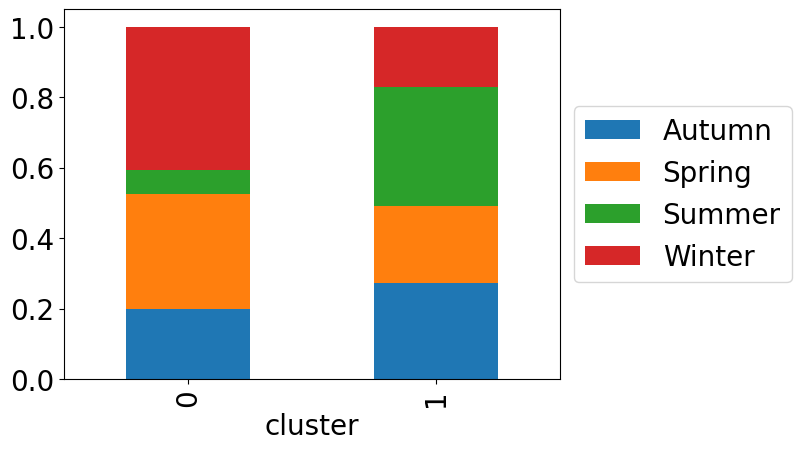

In [24]:
# Count all entries for all scores and all categories
plt.figure(figsize=(4, 4))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'season']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['season'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
df_a.unstack().plot.bar(stacked=True).legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
plt.xlabel('cluster')

/tmp/ipykernel_1496362/2971945609.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

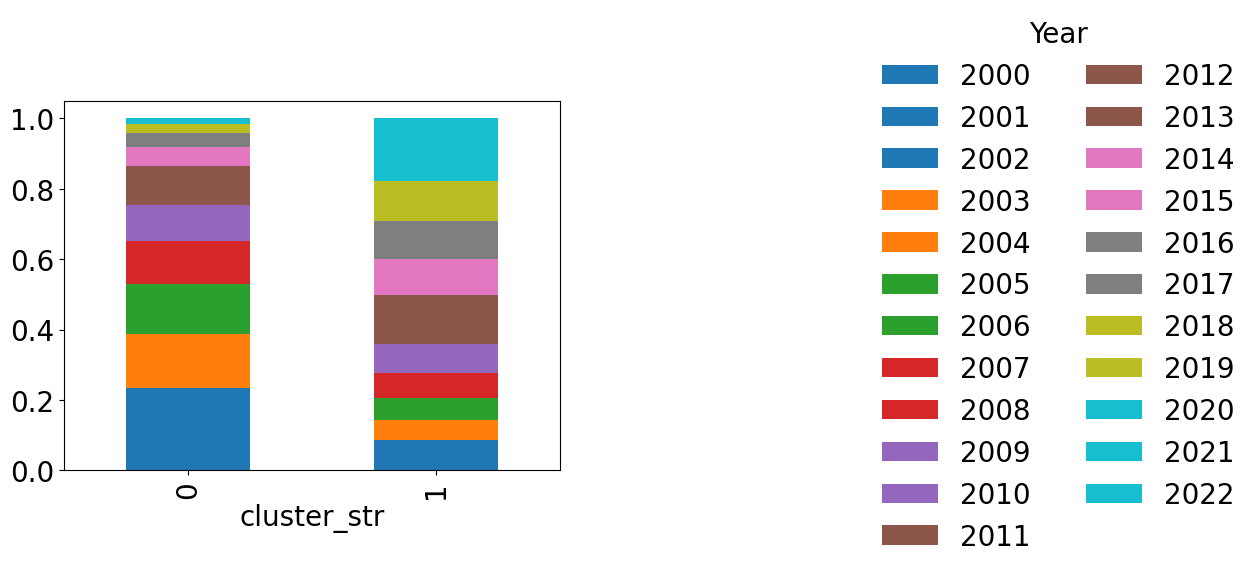

In [25]:
# Count all entries for all scores and all categories
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'year']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['year'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
ax =df_a.unstack().plot.bar(stacked=True, colormap='tab10')
# Put legend in 2–3 columns
ax.legend(
    title='Year',
    loc='center left',           # or 'center left'
    bbox_to_anchor=(1.6, 0.5),  # place below the plot
    ncol=2,                       # number of columns (adjust to fit)
    frameon=False
)
plt.tight_layout()
plt.show()

/tmp/ipykernel_1496362/275469193.py:18: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

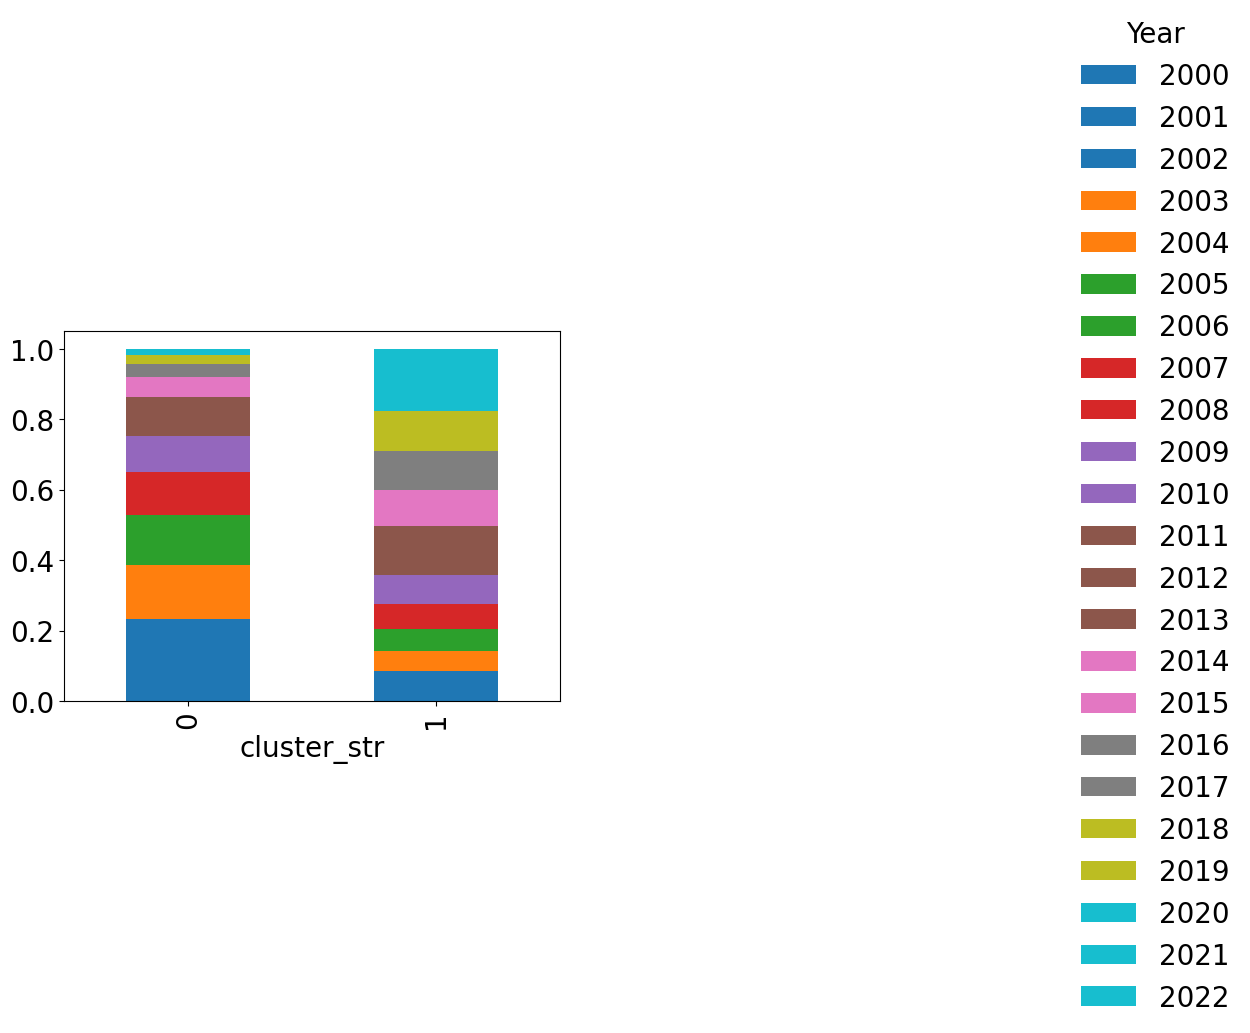

In [26]:
# Count all entries for all scores and all categories
plt.figure(figsize=(8, 6))
plt.rcParams.update({'font.size': 20}) 
a = df.groupby([df['cluster_str'], 'year']).size() 
# Normalize
b = df.groupby(df['cluster_str'])['year'].count()
df_a = a.div(b, axis=0,level=0)
# Plot
ax =df_a.unstack().plot.bar(stacked=True, colormap='tab10')
# Put legend in 2–3 columns
ax.legend(
    title='Year',
    loc='center left',           # or 'center left'
    bbox_to_anchor=(2, 0.5),  # place below the plot
    ncol=1,                       # number of columns (adjust to fit)
    frameon=False
)
plt.tight_layout()
plt.show()

Text(0.5, 15.444444444444445, 'cvd rate')

<Figure size 600x500 with 0 Axes>

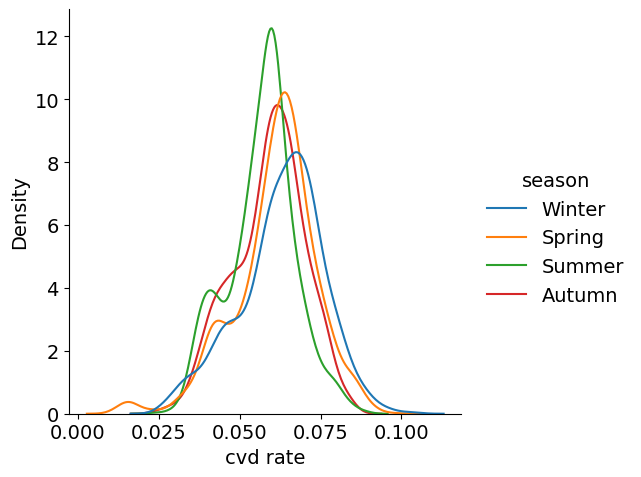

In [27]:
plt.figure(figsize=(6, 5))
plt.rcParams.update({'font.size': 14}) 
sns.displot(
    data=df,
    x="rate", hue="season",  kind="kde"
)
plt.xlabel('cvd rate')

In [32]:
#recover to original feature for following analysis
df[features] = X

In [65]:
df.rename(columns={'WD_avg': 'WS_avg', }, 
          inplace=True)

In [72]:
df.rename(columns={'rate65': 'CVD_rate_≥65', 'rate50_64': 'CVD_rate_50-64', 'rate30_49': 'CVD_rate_30_49' }, 
          inplace=True)

In [73]:
df

,day,Temp_avg,Temp_max,Temp_min,Temp_diff,Temp_avg_change,Temp_max_change,Temp_min_change,Temp_diff_change,Temp_max_avg,...,CVD_rate_≥65,CVD_rate_50-64,CVD_rate_30_49,year,month,season,cluster_raw,cluster,cluster_str,cvd_risk
0,2000-01-01,20.186218,24.484615,16.915385,7.569231,0.528526,0.853846,1.046154,-0.192308,22.742308,...,0.209756,0.141791,0.048000,2000,1,Winter,0,0,0,high
1,2000-01-02,19.487500,24.307692,15.376923,8.930769,-0.698718,-0.176923,-1.538462,1.361538,22.480769,...,0.199074,0.109244,0.027344,2000,1,Winter,0,0,0,low
2,2000-01-03,19.603846,23.061538,16.753846,6.307692,0.116346,-1.246154,1.376923,-2.623077,21.796154,...,0.268085,0.103175,0.033419,2000,1,Winter,0,0,0,high
3,2000-01-04,19.327885,23.800000,15.830769,7.969231,-0.275962,0.738462,-0.923077,1.661538,21.926923,...,0.133333,0.109705,0.013423,2000,1,Winter,0,0,0,low
4,2000-01-05,20.258013,25.115385,16.353846,8.761538,0.930128,1.315385,0.523077,0.792308,22.669231,...,0.174603,0.090909,0.017699,2000,1,Winter,0,0,0,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8364,2022-11-25,23.753274,26.971429,21.835714,5.135714,0.839583,1.907143,0.307143,1.600000,24.525000,...,0.140488,0.085954,0.034519,2022,11,Autumn,1,1,1,high
8365,2022-11-26,23.238988,25.600000,21.435714,4.164286,-0.514286,-1.371429,-0.400000,-0.971429,25.664286,...,0.135725,0.077465,0.030877,2022,11,Autumn,1,1,1,high
8366,2022-11-27,24.033929,27.450000,21.464286,5.985714,0.794940,1.850000,0.028571,1.821429,26.428571,...,0.134433,0.086587,0.032817,2022,11,Autumn,1,1,1,high
8367,2022-11-28,25.464286,29.578571,22.307143,7.271429,1.430357,2.128571,0.842857,1.285714,27.142857,...,0.129684,0.093525,0.030609,2022,11,Autumn,1,1,1,high


In [36]:
features

['Temp_avg',
 'Temp_max',
 'Temp_min',
 'Temp_diff',
 'Temp_avg_change',
 'Temp_max_change',
 'Temp_min_change',
 'Temp_diff_change',
 'Temp_max_avg',
 'Temp_min_avg',
 'Temp_diff_avg',
 'Temp_max_avg_change',
 'Temp_min_avg_change',
 'Temp_diff_avg_change',
 'PS_avg',
 'PS_max',
 'PS_min',
 'PS_diff',
 'PS_avg_change',
 'PS_max_change',
 'PS_min_change',
 'PS_diff_change',
 'PS_max_avg',
 'PS_min_avg',
 'PS_diff_avg',
 'PS_max_avg_change',
 'PS_min_avg_change',
 'PS_diff_avg_change',
 'RH_avg',
 'RH_max',
 'RH_min',
 'RH_diff',
 'RH_avg_change',
 'RH_max_change',
 'RH_min_change',
 'RH_diff_change',
 'RH_max_avg',
 'RH_min_avg',
 'RH_diff_avg',
 'RH_max_avg_change',
 'RH_min_avg_change',
 'RH_diff_avg_change',
 'WD_avg',
 'WD_max',
 'WD_min',
 'WD_diff',
 'WD_avg_change',
 'WD_max_change',
 'WD_min_change',
 'WD_diff_change',
 'WD_max_avg',
 'WD_min_avg',
 'WD_diff_avg',
 'WD_max_avg_change',
 'WD_min_avg_change',
 'WD_diff_avg_change',
 'FLT_avg',
 'FLT_max',
 'FLT_min',
 'FLT_diff',

In [44]:
from scipy.stats import mannwhitneyu

# ---- User settings ----
cluster_col = "cluster"      # name of the column with cluster index
cluster_a = 0                # first cluster label
cluster_b = 1                # second cluster label

# Assume you already have your dataframe `df`
# df = pd.read_csv("your_file.csv")

# ---- Split into two groups based on cluster index ----
group_a = df[df[cluster_col] == cluster_a]
group_b = df[df[cluster_col] == cluster_b]

results = []

features_to_compare = [
    "Temp_avg",
    "PS_avg",
    "RH_avg",
    "WD_avg",
    "FLT_avg",
    "PP_sum",
    "DeHumidify_Load",
    "CO_avg",
    "NO_avg",
    "NO2_avg",
    "NOx_avg",
    "O3_avg",
    "PM10_avg",
    "PM2.5_avg",
    "SO2_avg",
    "rate",
    "rate65",
    "rate50_64",
    "rate30_49"
]

#for col in df.columns:
for col in features_to_compare:
    # skip the cluster column itself
    if col == cluster_col:
        continue
    
    # only test numeric columns
    if not pd.api.types.is_numeric_dtype(df[col]):
        continue
    
    x = group_a[col].dropna()
    y = group_b[col].dropna()
    
    # need at least 2 samples in each group for a reasonable test
    if len(x) < 2 or len(y) < 2:
        continue
    
    # Mann–Whitney U test (a.k.a. rank-sum)
    stat, p_value = mannwhitneyu(x, y, alternative="two-sided")
    
    results.append({
        "feature": col,
        "u_stat": stat,
        "p_value": p_value,
        "n_group_a": len(x),
        "n_group_b": len(y),
        "median_group_a": x.median(),
        "median_group_b": y.median()
    })

# ---- Collect results into a DataFrame and sort by p-value ----
results_df = pd.DataFrame(results).sort_values("p_value")
print(results_df)

            feature      u_stat        p_value  n_group_a  n_group_b  \
7            CO_avg  13649106.5   0.000000e+00       2590       5779   
10          NOx_avg  14069678.5   0.000000e+00       2590       5779   
13        PM2.5_avg  13304193.0   0.000000e+00       2590       5779   
14          SO2_avg  12904761.5   0.000000e+00       2590       5779   
12         PM10_avg  13137378.5   0.000000e+00       2590       5779   
8            NO_avg  12811349.0   0.000000e+00       2590       5779   
9           NO2_avg  14286427.5   0.000000e+00       2590       5779   
0          Temp_avg   3986176.0  8.234764e-257       2590       5779   
16           rate65  10917186.0  1.534187e-247       2590       5779   
4           FLT_avg   4088356.0  3.788557e-242       2590       5779   
1            PS_avg  10713393.0  2.855306e-219       2590       5779   
5            PP_sum   4840006.0  4.800193e-148       2590       5779   
17        rate50_64   9788194.0  1.250359e-112       2590       

Temp_avg: U=3986176.000, p=8.235e-257, sig=****


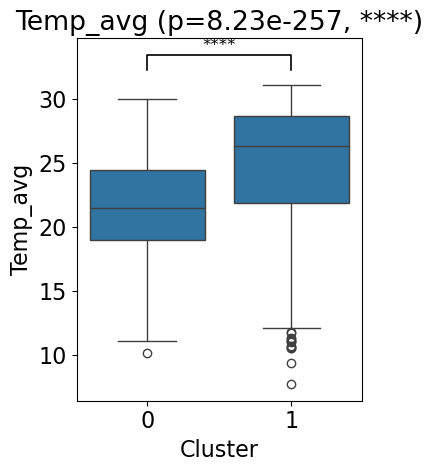

PS_avg: U=10713393.000, p=2.855e-219, sig=****


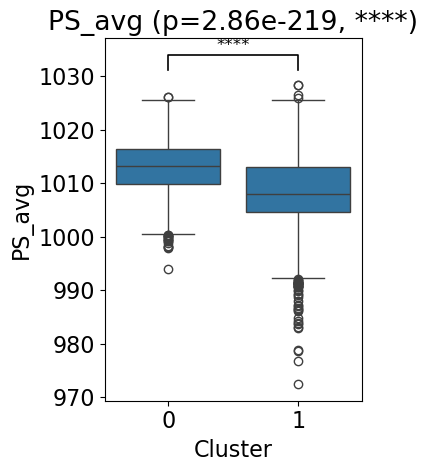

RH_avg: U=5972305.000, p=1.623e-49, sig=****


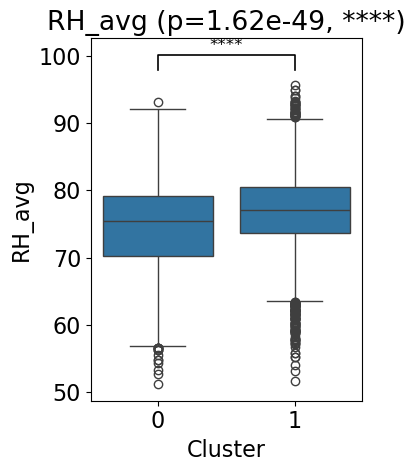

WS_avg: U=6400802.500, p=2.999e-26, sig=****


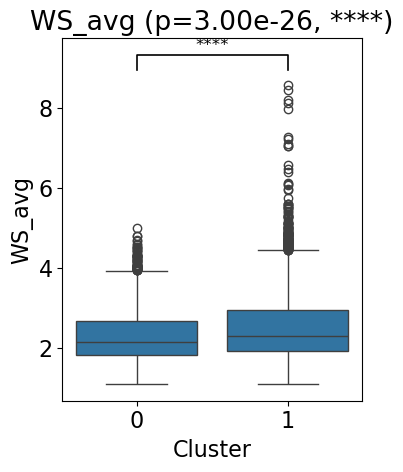

FLT_avg: U=4088356.000, p=3.789e-242, sig=****


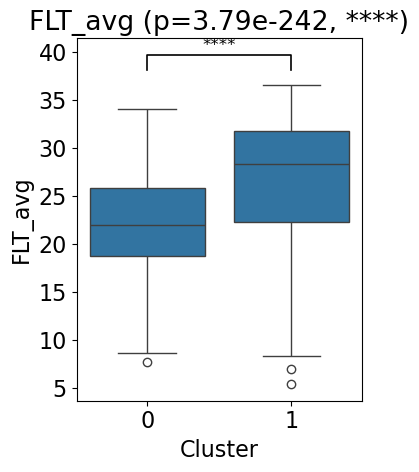

PP_sum: U=4840006.000, p=4.800e-148, sig=****


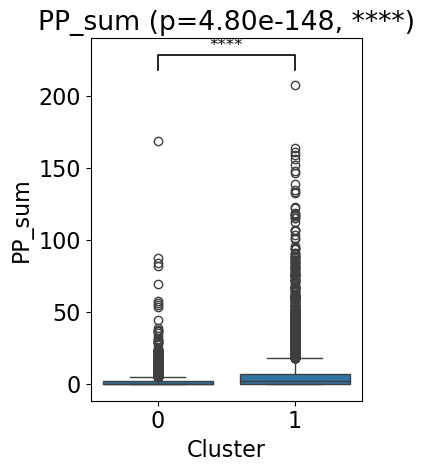

DeHumidify_Load: U=5995736.500, p=3.631e-48, sig=****


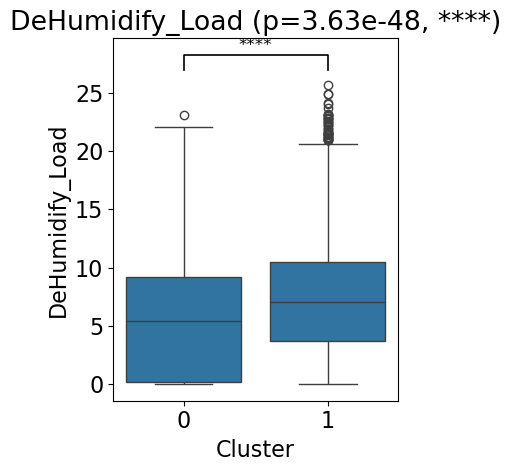

CO_avg: U=13649106.500, p=0.000e+00, sig=****


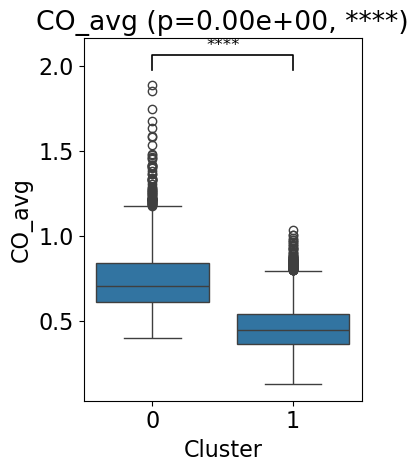

NO_avg: U=12811349.000, p=0.000e+00, sig=****


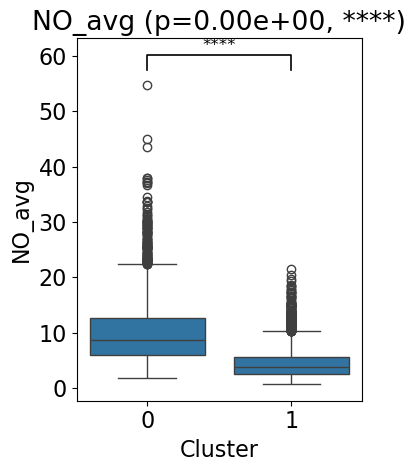

NO2_avg: U=14286427.500, p=0.000e+00, sig=****


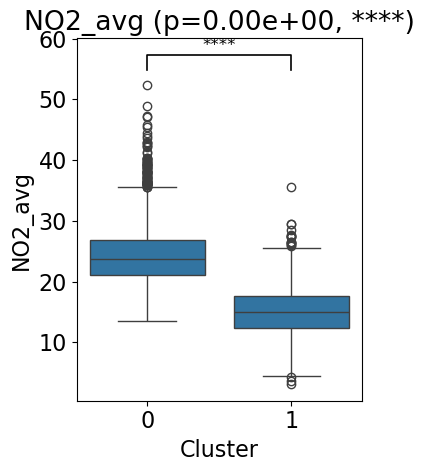

NOx_avg: U=14069678.500, p=0.000e+00, sig=****


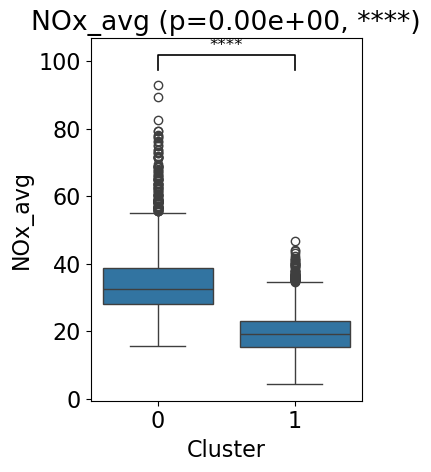

O3_avg: U=7969922.500, p=1.959e-06, sig=****


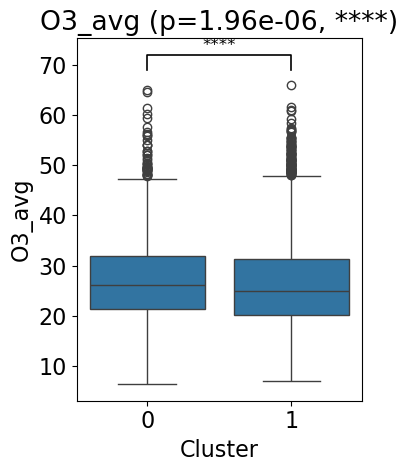

PM10_avg: U=13137378.500, p=0.000e+00, sig=****


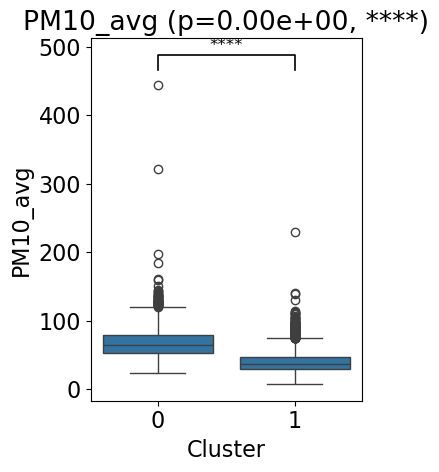

PM2.5_avg: U=13304193.000, p=0.000e+00, sig=****


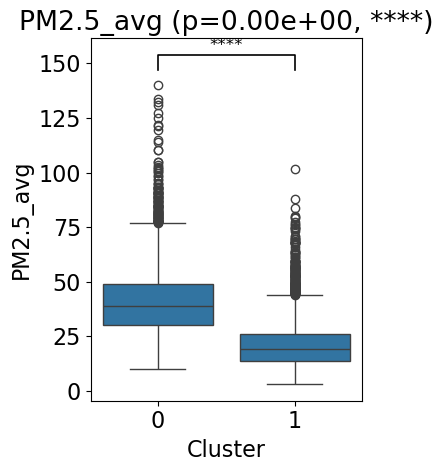

SO2_avg: U=12904761.500, p=0.000e+00, sig=****


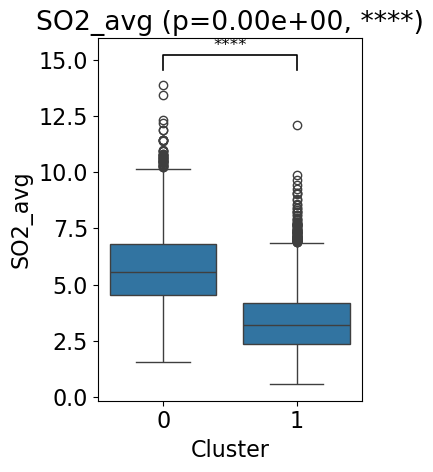

rate: U=8696790.000, p=1.664e-32, sig=****


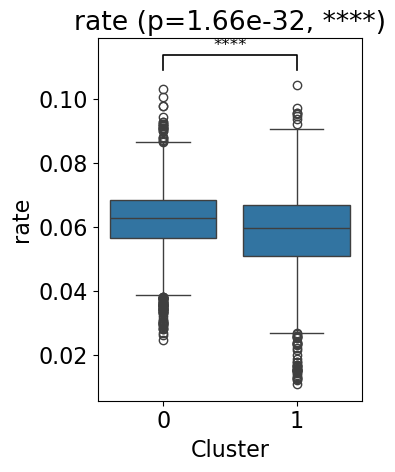

rate65: U=10917186.000, p=1.534e-247, sig=****


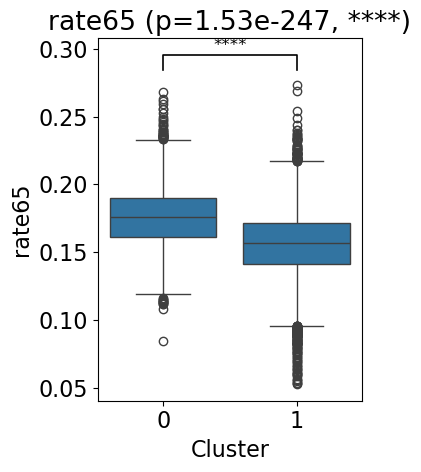

rate50_64: U=9788194.000, p=1.250e-112, sig=****


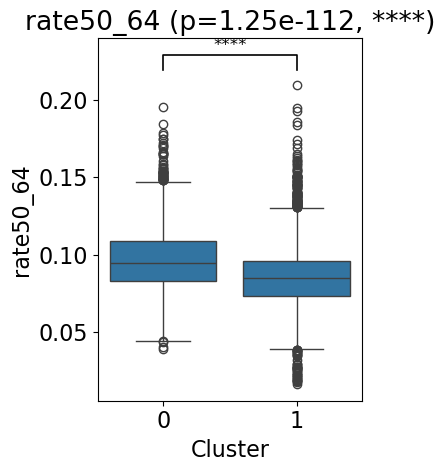

rate30_49: U=8102363.000, p=1.414e-09, sig=****


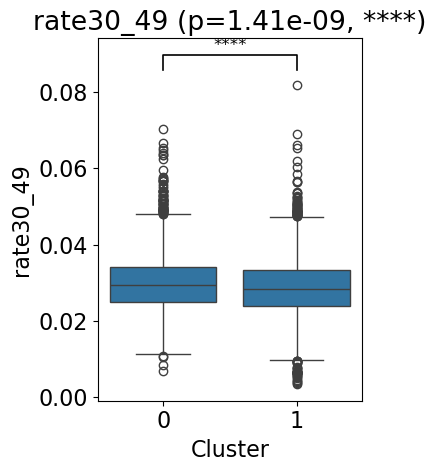

In [68]:
# ========== User settings ==========
cluster_col = "cluster"     # name of the cluster column
cluster_a = 0               # label of group A
cluster_b = 1               # label of group B

features_to_compare = [
    "Temp_avg",
    "PS_avg",
    "RH_avg",
    "WS_avg",
    "FLT_avg",
    "PP_sum",
    "DeHumidify_Load",
    "CO_avg",
    "NO_avg",
    "NO2_avg",
    "NOx_avg",
    "O3_avg",
    "PM10_avg",
    "PM2.5_avg",
    "SO2_avg",
    "rate",
    "rate65",
    "rate50_64",
    "rate30_49"
]

# df = ...  # your DataFrame

# ===================================
# Subset groups
group_a = df[df[cluster_col] == cluster_a]
group_b = df[df[cluster_col] == cluster_b]

def get_sig_label(p):
    """Return a significance label for a given p-value."""
    if p < 0.0001:
        return "****"
    elif p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

for feat in features_to_compare:
    x = group_a[feat].dropna()
    y = group_b[feat].dropna()

    if len(x) < 2 or len(y) < 2:
        print(f"Skip {feat}: not enough data.")
        continue

    # Mann–Whitney U rank-sum test
    stat, p_value = mannwhitneyu(x, y, alternative="two-sided")
    sig = get_sig_label(p_value)
    print(f"{feat}: U={stat:.3f}, p={p_value:.3e}, sig={sig}")

    # Prepare data in long format for seaborn
    tmp = pd.DataFrame({
        cluster_col: [cluster_a] * len(x) + [cluster_b] * len(y),
        feat: pd.concat([x, y], axis=0).values,
    })

    # ----- Plot -----
    plt.figure(figsize=(4, 5))
    sns.boxplot(data=tmp, x=cluster_col, y=feat)

    plt.title(f"{feat} (p={p_value:.2e}, {sig})")

    # Add significance bar between the two boxes
    x1, x2 = 0, 1
    y_max = tmp[feat].max()
    y_min = tmp[feat].min()
    h = 0.05 * (y_max - y_min if y_max > y_min else 1.0)
    y = y_max + h

    plt.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.2, c="k")
    plt.text(
        (x1 + x2) / 2, y + h * 1.1,
        sig,
        ha="center", va="bottom", fontsize=12
    )

    plt.xlabel("Cluster")
    plt.tight_layout()
    plt.show()

Temp_avg | Cluster 0 vs Cluster 1: U=3986176.000  p=8.235e-257  sig=****
Temp_avg | Cluster 0 vs Winter: U=3945103.500  p=9.431e-181  sig=****
Temp_avg | Cluster 0 vs Summer: U=182821.000  p=0.000e+00  sig=****


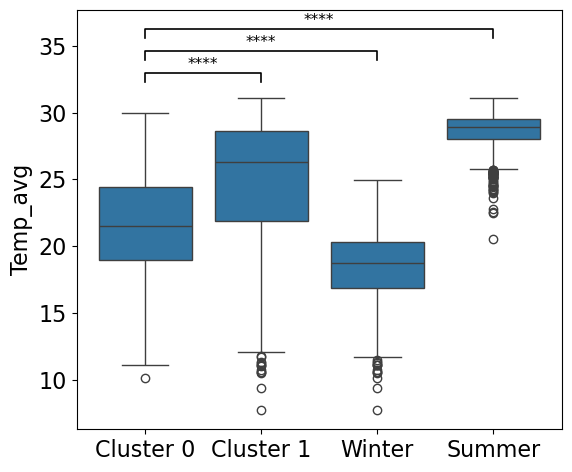

PS_avg | Cluster 0 vs Cluster 1: U=10713393.000  p=2.855e-219  sig=****
PS_avg | Cluster 0 vs Winter: U=1590392.000  p=5.904e-121  sig=****
PS_avg | Cluster 0 vs Summer: U=5154825.500  p=0.000e+00  sig=****


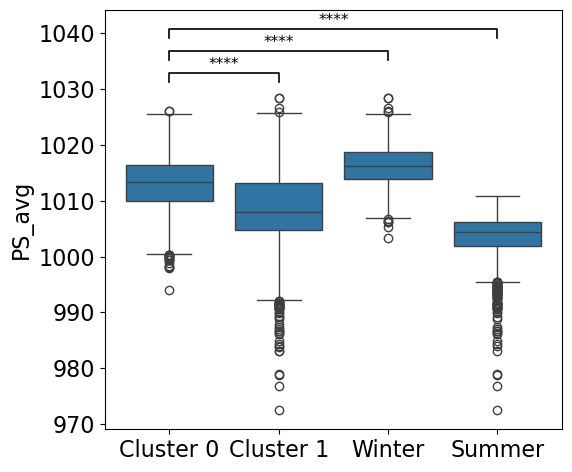

RH_avg | Cluster 0 vs Cluster 1: U=5972305.000  p=1.623e-49  sig=****
RH_avg | Cluster 0 vs Winter: U=2407816.500  p=1.062e-07  sig=****
RH_avg | Cluster 0 vs Summer: U=2210063.500  p=2.814e-30  sig=****


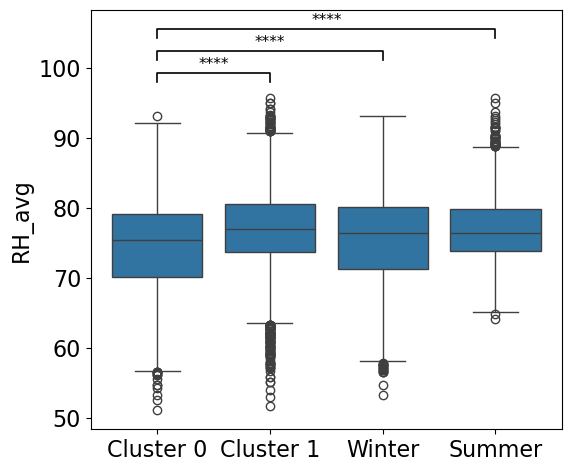

WS_avg | Cluster 0 vs Cluster 1: U=6400802.500  p=2.999e-26  sig=****
WS_avg | Cluster 0 vs Winter: U=1664416.000  p=6.940e-105  sig=****
WS_avg | Cluster 0 vs Summer: U=3142965.000  p=3.741e-18  sig=****


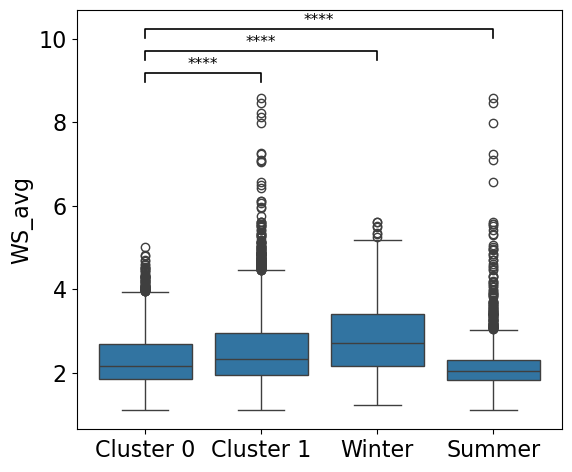

FLT_avg | Cluster 0 vs Cluster 1: U=4088356.000  p=3.789e-242  sig=****
FLT_avg | Cluster 0 vs Winter: U=3938757.500  p=5.237e-179  sig=****
FLT_avg | Cluster 0 vs Summer: U=180034.000  p=0.000e+00  sig=****


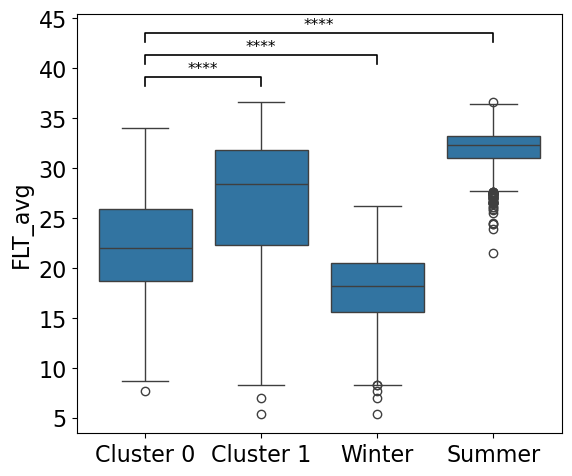

PP_sum | Cluster 0 vs Cluster 1: U=4840006.000  p=4.800e-148  sig=****
PP_sum | Cluster 0 vs Winter: U=2233604.000  p=3.511e-20  sig=****
PP_sum | Cluster 0 vs Summer: U=1729763.500  p=5.519e-106  sig=****


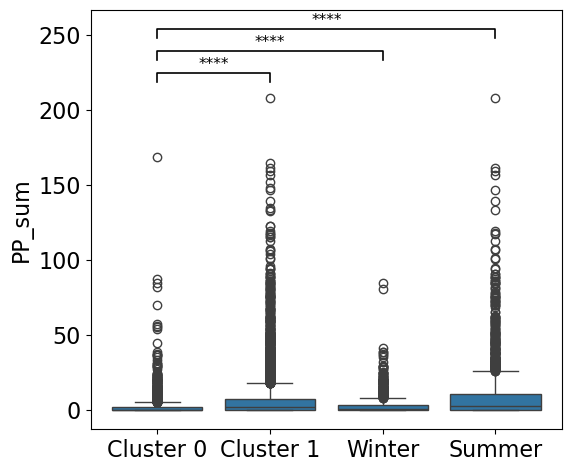

DeHumidify_Load | Cluster 0 vs Cluster 1: U=5995736.500  p=3.631e-48  sig=****
DeHumidify_Load | Cluster 0 vs Winter: U=2405468.000  p=6.649e-08  sig=****
DeHumidify_Load | Cluster 0 vs Summer: U=2221276.500  p=3.643e-29  sig=****


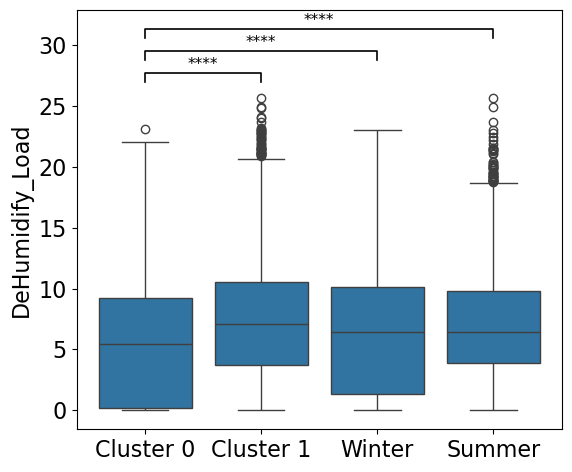

CO_avg | Cluster 0 vs Cluster 1: U=13649106.500  p=0.000e+00  sig=****
CO_avg | Cluster 0 vs Winter: U=3623562.500  p=4.238e-103  sig=****
CO_avg | Cluster 0 vs Summer: U=4862291.000  p=0.000e+00  sig=****


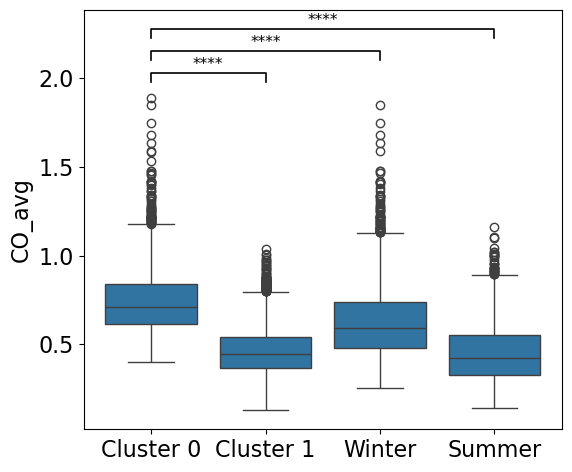

NO_avg | Cluster 0 vs Cluster 1: U=12811349.000  p=0.000e+00  sig=****
NO_avg | Cluster 0 vs Winter: U=3164951.000  p=3.249e-30  sig=****
NO_avg | Cluster 0 vs Summer: U=4368973.500  p=2.431e-270  sig=****


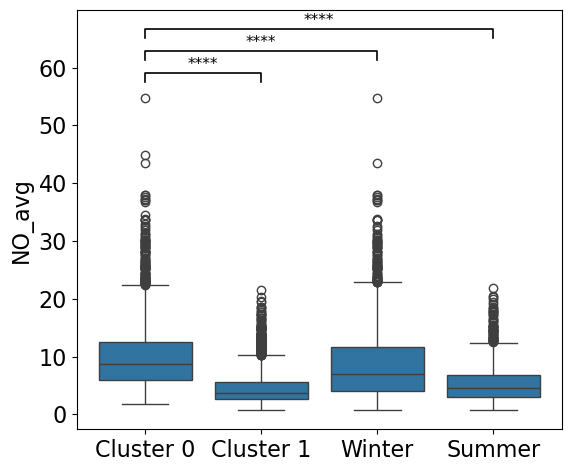

NO2_avg | Cluster 0 vs Cluster 1: U=14286427.500  p=0.000e+00  sig=****
NO2_avg | Cluster 0 vs Winter: U=3597211.000  p=1.047e-97  sig=****
NO2_avg | Cluster 0 vs Summer: U=5286200.500  p=0.000e+00  sig=****


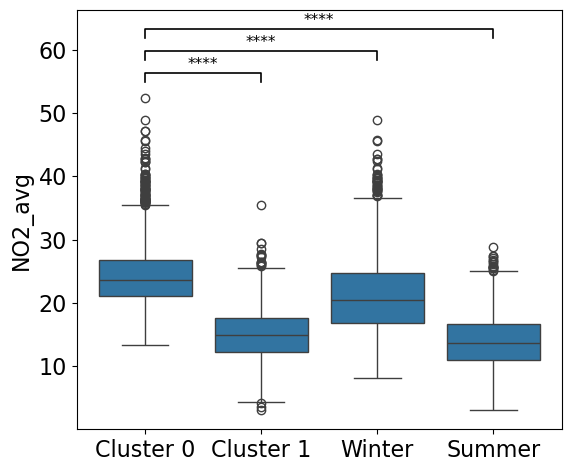

NOx_avg | Cluster 0 vs Cluster 1: U=14069678.500  p=0.000e+00  sig=****
NOx_avg | Cluster 0 vs Winter: U=3426222.500  p=2.759e-66  sig=****
NOx_avg | Cluster 0 vs Summer: U=5090993.500  p=0.000e+00  sig=****


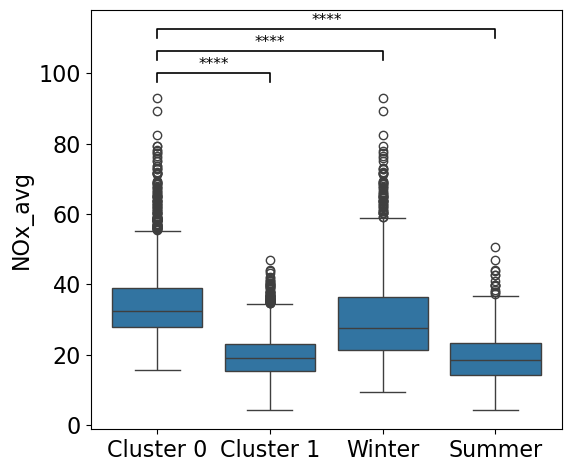

O3_avg | Cluster 0 vs Cluster 1: U=7969922.500  p=1.959e-06  sig=****
O3_avg | Cluster 0 vs Winter: U=3002685.500  p=4.696e-15  sig=****
O3_avg | Cluster 0 vs Summer: U=3954438.000  p=3.612e-151  sig=****


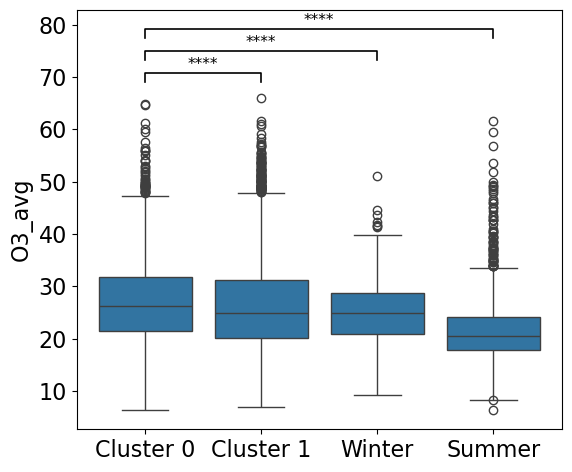

PM10_avg | Cluster 0 vs Cluster 1: U=13137378.500  p=0.000e+00  sig=****
PM10_avg | Cluster 0 vs Winter: U=3433486.000  p=1.705e-67  sig=****
PM10_avg | Cluster 0 vs Summer: U=5127260.500  p=0.000e+00  sig=****


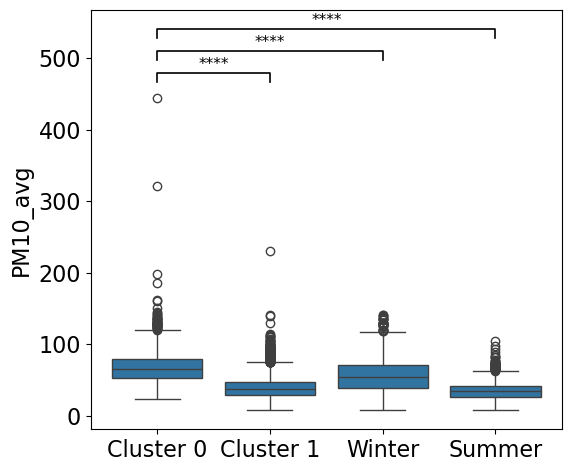

PM2.5_avg | Cluster 0 vs Cluster 1: U=13304193.000  p=0.000e+00  sig=****
PM2.5_avg | Cluster 0 vs Winter: U=3554002.500  p=3.502e-89  sig=****
PM2.5_avg | Cluster 0 vs Summer: U=5037297.500  p=0.000e+00  sig=****


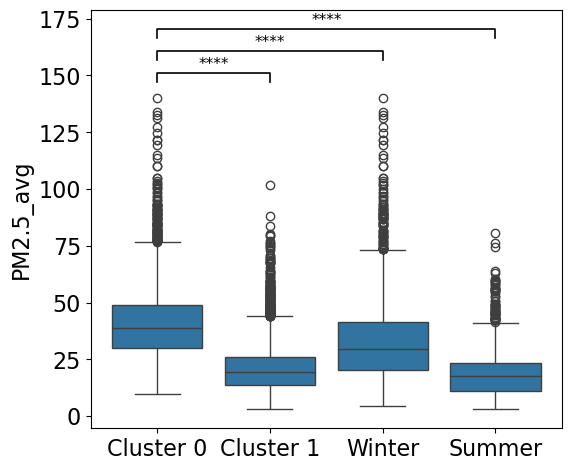

SO2_avg | Cluster 0 vs Cluster 1: U=12904761.500  p=0.000e+00  sig=****
SO2_avg | Cluster 0 vs Winter: U=3544176.500  p=2.677e-87  sig=****
SO2_avg | Cluster 0 vs Summer: U=4463833.500  p=1.732e-302  sig=****


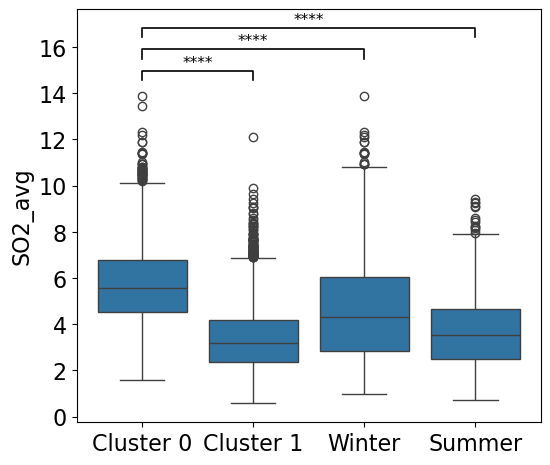

rate | Cluster 0 vs Cluster 1: U=8696790.000  p=1.664e-32  sig=****
rate | Cluster 0 vs Winter: U=2474640.000  p=1.238e-04  sig=***
rate | Cluster 0 vs Summer: U=3577415.000  p=6.994e-73  sig=****


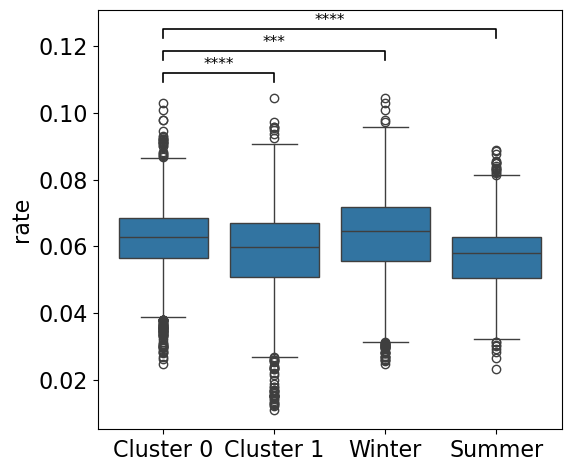

CVD_rate_≥65 | Cluster 0 vs Cluster 1: U=10917186.000  p=1.534e-247  sig=****
CVD_rate_≥65 | Cluster 0 vs Winter: U=2946874.500  p=4.084e-11  sig=****
CVD_rate_≥65 | Cluster 0 vs Summer: U=4212190.000  p=3.437e-221  sig=****


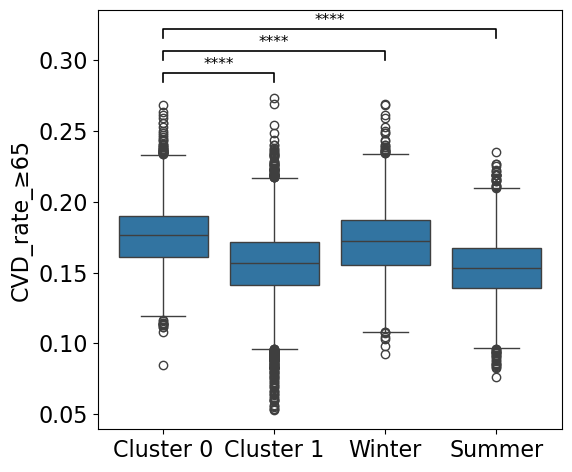

CVD_rate_50-64 | Cluster 0 vs Cluster 1: U=9788194.000  p=1.250e-112  sig=****
CVD_rate_50-64 | Cluster 0 vs Winter: U=2879399.000  p=3.233e-07  sig=****
CVD_rate_50-64 | Cluster 0 vs Summer: U=3838010.500  p=6.196e-124  sig=****


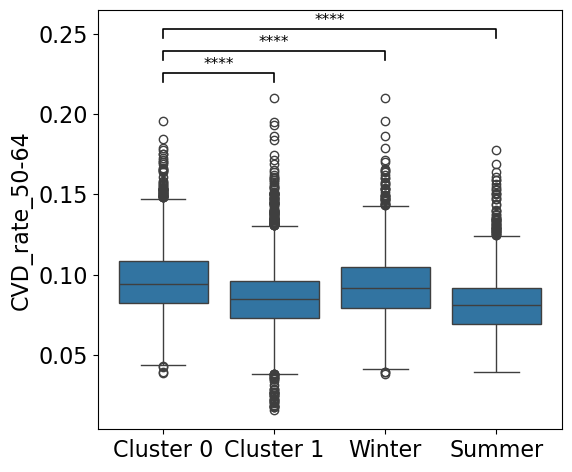

CVD_rate_30_49 | Cluster 0 vs Cluster 1: U=8102363.000  p=1.414e-09  sig=****
CVD_rate_30_49 | Cluster 0 vs Winter: U=2693630.000  p=3.160e-01  sig=ns
CVD_rate_30_49 | Cluster 0 vs Summer: U=3281834.000  p=1.584e-31  sig=****


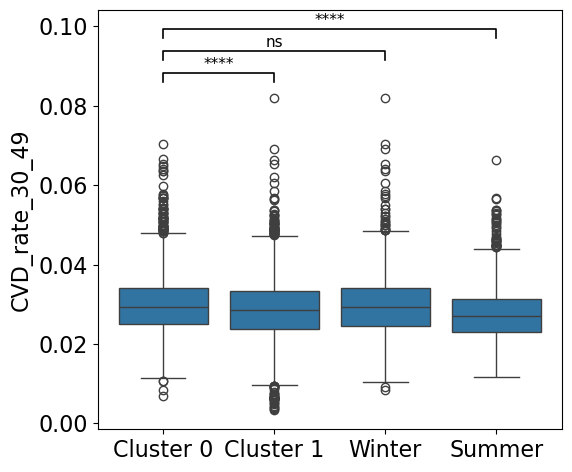

In [74]:

# ========== User settings ==========
cluster_col = "cluster"      # name of the cluster column
cluster_a = 0                # label for group A
cluster_b = 1                # label for group B

season_col = "season"        # column name for season
winter_label = "Winter"      # value for winter in Season column
summer_label = "Summer"      # value for summer in Season column

features_to_compare = [
    "Temp_avg",
    "PS_avg",
    "RH_avg",
    "WS_avg",
    "FLT_avg",
    "PP_sum",
    "DeHumidify_Load",
    "CO_avg",
    "NO_avg",
    "NO2_avg",
    "NOx_avg",
    "O3_avg",
    "PM10_avg",
    "PM2.5_avg",
    "SO2_avg",
    "rate",
    "CVD_rate_≥65",
    "CVD_rate_50-64",
    "CVD_rate_30_49"
]  # put your feature names here

# df = ...  # your DataFrame

# ===================================
def get_sig_label(p):
    """Return a significance label for a given p-value."""
    if p < 0.0001:
        return "****"
    elif p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return "ns"

def add_sig_bar(ax, x1, x2, y, h, label):
    """Draw significance bar between x1 and x2 at height y."""
    ax.plot([x1, x1, x2, x2], [y, y + h, y + h, y], lw=1.2, c="k")
    ax.text((x1 + x2) / 2.0, y + h * 1.1, label,
            ha="center", va="bottom", fontsize=11)
    
plt.rcParams.update({'font.size': 16, 'axes.labelsize': 16, 'xtick.labelsize': 16})

for feat in features_to_compare:
    # ---- data for each group ----
    vals_cluster_a = df.loc[df[cluster_col] == cluster_a, feat].dropna()
    vals_cluster_b = df.loc[df[cluster_col] == cluster_b, feat].dropna()
    vals_winter    = df.loc[df[season_col] == winter_label, feat].dropna()
    vals_summer    = df.loc[df[season_col] == summer_label, feat].dropna()

    # skip if not enough data in key groups
    if len(vals_cluster_a) < 2 or len(vals_cluster_b) < 2:
        print(f"Skip {feat}: not enough data in cluster 0 or 1.")
        continue

    # Prepare group dict and plotting order
    group_data = {
        f"Cluster {cluster_a}": vals_cluster_a,
        f"Cluster {cluster_b}": vals_cluster_b,
        winter_label: vals_winter,
        summer_label: vals_summer,
    }
    order = list(group_data.keys())

    # ---- Mann–Whitney tests for the three pairs ----
    pairs = [
        (f"Cluster {cluster_a}", f"Cluster {cluster_b}"),  # 0 vs 1
        (f"Cluster {cluster_a}", winter_label),            # 0 vs Winter
        (f"Cluster {cluster_a}", summer_label),            # 0 vs Summer
    ]

    pair_results = []
    for g1, g2 in pairs:
        x = group_data[g1]
        y = group_data[g2]
        if len(x) < 2 or len(y) < 2:
            stat, p_val, sig = np.nan, np.nan, "NA"
        else:
            stat, p_val = mannwhitneyu(x, y, alternative="two-sided")
            sig = get_sig_label(p_val)
        pair_results.append((g1, g2, stat, p_val, sig))
        print(f"{feat} | {g1} vs {g2}: U={stat:.3f}  p={p_val:.3e}  sig={sig}")

    # ---- Data for plotting ----
    plot_vals = pd.concat(list(group_data.values()), axis=0)
    plot_groups = sum(
        [[g] * len(vals) for g, vals in group_data.items()],
        []
    )
    plot_df = pd.DataFrame({"Group": plot_groups, feat: plot_vals.values})

    # ----- Plot -----
    fig, ax = plt.subplots(figsize=(6, 5))
    sns.boxplot(data=plot_df, x="Group", y=feat, order=order, ax=ax)

    # Title: show main comparison p-value (0 vs 1)
    #main_p = pair_results[0][3]
    #main_sig = pair_results[0][4]
    #ax.set_title(f"{feat}  (0 vs 1: p={main_p:.2e}, {main_sig})")

    # ----- Add three significance bars -----
    y_min = plot_df[feat].min()
    y_max = plot_df[feat].max()
    value_range = y_max - y_min if y_max > y_min else 1.0

    base_y = y_max + 0.05 * value_range
    step = 0.07 * value_range
    bar_height = 0.03 * value_range

    for i, (g1, g2, _, _, sig) in enumerate(pair_results):
        if sig == "NA" or np.isnan(main_p):
            continue
        x1 = order.index(g1)
        x2 = order.index(g2)
        y = base_y + i * step
        add_sig_bar(ax, x1, x2, y, bar_height, sig)

    #plt.xticks(fontsize=12)
    #plt.yticks(fontsize=12)
    ax.set_xlabel("")
    plt.tight_layout()
    plt.show()